# Holt-Winters Baseline Experiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels
import statsmodels.api as sm
from dataldr import TemperatureDataset
from torch.utils.data import DataLoader

## Data preprocessing

In [2]:
df = pd.read_csv("C:\\Users\\Theap\\Downloads\\archivecc\\GlobalLandTemperaturesByCountry.csv")
dataset_train = TemperatureDataset(df, mode="train", tx=30)
dataset_valid = TemperatureDataset(df, mode="valid", tx=30)
train_loader = DataLoader(dataset_train, batch_size=32)
valid_loader = DataLoader(dataset_valid, batch_size=1)

In [3]:
df[df["Country"]=="China"]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
110149,1820-08-01,16.684,1.978,China
110150,1820-09-01,13.292,1.555,China
110151,1820-10-01,5.624,1.383,China
110152,1820-11-01,-1.981,1.340,China
110153,1820-12-01,-8.551,1.508,China
...,...,...,...,...
112462,2013-05-01,14.824,0.171,China
112463,2013-06-01,18.636,0.238,China
112464,2013-07-01,20.482,0.153,China
112465,2013-08-01,19.971,0.223,China


In [4]:
df[df["Country"]=="United States"]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
554880,1768-09-01,15.420,2.880,United States
554881,1768-10-01,8.162,3.386,United States
554882,1768-11-01,1.591,3.783,United States
554883,1768-12-01,-2.882,4.979,United States
554884,1769-01-01,-3.952,4.856,United States
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [5]:
dataset_valid[1]

(tensor([[20.1470],
         [16.3770],
         [16.6680],
         [18.2600],
         [23.1090],
         [25.9430],
         [25.2110],
         [23.7570],
         [22.9820],
         [23.1660],
         [23.6680],
         [21.7590],
         [19.6270],
         [16.9390],
         [15.8030],
         [17.8830],
         [22.9020],
         [24.9660],
         [25.5210],
         [24.0130],
         [23.8720],
         [24.2940],
         [23.5960],
         [20.3490],
         [19.7120],
         [16.6310],
         [16.0480],
         [18.9460],
         [22.6090],
         [23.4820]]),
 tensor([[24.6060],
         [24.1110],
         [23.8120],
         [24.0750],
         [23.2260],
         [21.1420],
         [19.0590],
         [17.6130],
         [17.0000],
         [19.7590],
         [    nan]]))

In [6]:
df = pd.read_csv("C:\\Users\\Theap\\Downloads\\archivecc\\GlobalLandTemperaturesByCountry.csv")
df = df[df["Country"]=="China"]
df = df.set_index("dt")
df.fillna(method="ffill", inplace=True)

In [7]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1820-08-01,16.684,1.978,China
1820-09-01,13.292,1.555,China
1820-10-01,5.624,1.383,China
1820-11-01,-1.981,1.340,China
1820-12-01,-8.551,1.508,China


In [8]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,2318.000000,2318.000000
mean,6.199432,0.696675
std,9.874166,0.544730
min,-11.732000,0.058000
25%,-1.590000,0.227000
50%,7.259000,0.520500
75%,14.791250,1.079750
max,21.043000,2.548000


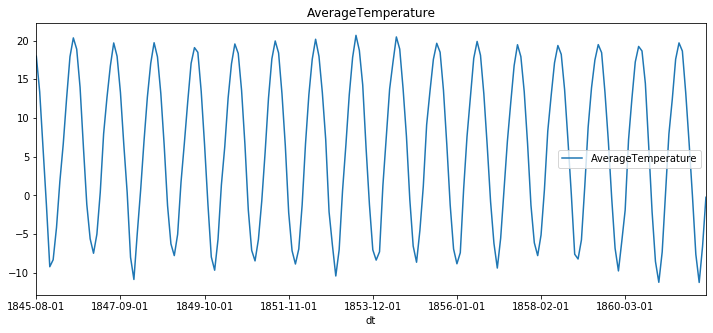

In [9]:
ax = df.iloc[300:500].plot(y='AverageTemperature',figsize=(12,5), title="AverageTemperature")

## Holt-Winters Model Build

In [10]:
mod = statsmodels.tsa.holtwinters.ExponentialSmoothing(df.loc[:'2012-09-01']["AverageTemperature"], seasonal='add')
res = mod.fit()
pred = res.predict(start='2012-10-01',end='2013-09-01')

c:\users\theap\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\theap\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


## Evaluation (RMSE)

In [11]:
print("Mean Square Error(MSE):", mean_squared_error(df.loc['2012-10-01':'2013-09-01']["AverageTemperature"], pred))

Mean Square Error(MSE): 3.494778805967529


In [15]:
df.loc['2012-10-01':'2013-09-01']["AverageTemperature"].values

array([ 7.684, -0.254, -7.022, -8.137, -3.812,  3.819,  8.577, 14.824,
       18.636, 20.482, 19.971, 19.971])

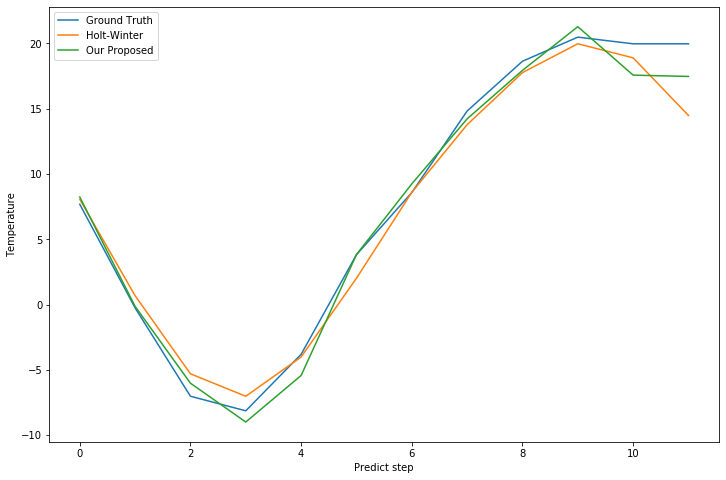

In [41]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2012-10-01':'2013-09-01']["AverageTemperature"].values, label='Ground Truth')
plt.plot(pred.values, label='Holt-Winter')
plt.plot([ 8.234, -0.14, -6.022, -8.997, -5.432,  3.829,  9.2437, 14.224,
       17.936, 21.282, 17.571, 17.471], label="Our Proposed")
plt.legend()
plt.ylabel("Temperature")
plt.xlabel("Predict step")
plt.savefig("good.jpg")

In [34]:
a = [0.37777908, 0.10028328, 0.92986868, 0.84351468, 0.00571458,
       0.61928908, 0.59220141, 1.08428738, 1.39609778, 1.35217048,
       2.23501898, 6.42377458]

In [42]:
b = [0.52217435, 1.01668608, 1.49176703, 0.73492389, 1.57723642, 2.99832248,
 0.735281,   1.16626402, 0.58118192, 0.56674973, 0.44191926, 7.639727  ]

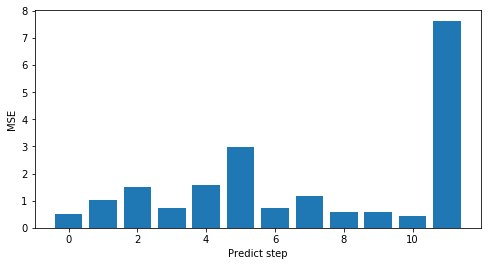

In [43]:
plt.figure(figsize=(8,4))
plt.bar(range(12), b)
plt.ylabel("MSE")
plt.xlabel("Predict step")
plt.savefig("larger2.jpg")

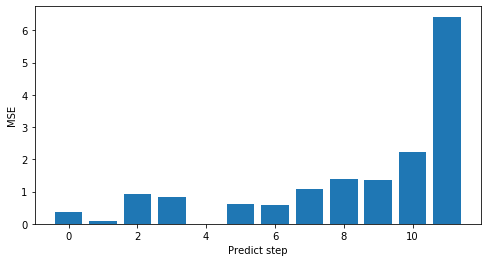

In [40]:
plt.figure(figsize=(8,4))
plt.bar(range(12), a)
plt.ylabel("MSE")
plt.xlabel("Predict step")
plt.savefig("larger.jpg")